In [0]:
from azure.storage.blob import BlobServiceClient, ContentSettings
from datetime import datetime
from io import StringIO
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [0]:
def configurar_grafico() -> None:
    """Configurações padrão para gráficos."""
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

In [0]:
def salvar_grafico(nome_arquivo: str) -> None:
    """Salva o gráfico localmente e faz upload para o Blob Storage."""
    caminho_arquivo_local = os.path.join(pasta_destino_local, nome_arquivo)
    
    # Salva o gráfico localmente
    plt.savefig(caminho_arquivo_local, bbox_inches='tight', pad_inches=0.1)
    
    # Faz o upload do arquivo para o Blob Storage
    pasta_destino_blob = f'graficos/{datetime.now().strftime("%Y%m%d")}/'
    nome_arquivo_blob = f'{pasta_destino_blob}{nome_arquivo}'
    blob_client = container_client.get_blob_client(nome_arquivo_blob)
    with open(caminho_arquivo_local, "rb") as data:
        blob_client.upload_blob(data, overwrite=True, content_settings=ContentSettings(content_type='image/png'))

 

In [0]:
def criar_grafico_canais(df: DataFrame) -> None:
    """Cria e salva o gráfico de barras para os canais."""
    configurar_grafico()
    sns.barplot(
        x=df['canal'].value_counts().index,
        y=df['canal'].value_counts().values,
        palette='Reds',
        width=0.5 
    )
    plt.xlabel('Canais')
    plt.ylabel('Número de vídeos')
    plt.title('Canais com mais vídeos')
    plt.xticks(rotation='vertical')

    nome_arquivo = 'grafico_canais.png'
    salvar_grafico(nome_arquivo)




In [0]:
def criar_grafico_duracao(df: DataFrame) -> None :
    """Cria e salva o gráfico de barras para a duração dos vídeos."""
    configurar_grafico()
    faixas = [0, 15, 30, 60, 120, float('inf')]
    labels = ['0-15m', '16-30m', '30m-1h', '1h-2h', '3h+']
    frequencia = pd.cut(df['duracao'], bins=faixas, labels=labels, right=False).value_counts().sort_index()

    sns.barplot(x=frequencia.index, y=frequencia.values, palette='Reds')
    plt.xlabel('Duração')
    plt.ylabel('Frequência')
    plt.title('Duração dos vídeos')

    nome_arquivo = 'grafico_duracao.png'
    salvar_grafico(nome_arquivo)


In [0]:
def criar_grafico_visualizacoes(df: DataFrame) -> None:
    """Cria e salva o gráfico de barras para a quantidade de visualizações."""
    configurar_grafico()
    faixas = [0, 1000000, 2000000, 3000000, 40000000, float('inf')]
    labels = ['0-1M', '1-2M', '2M-3M', '3M-4M', '4M +']
    frequencia = pd.cut(df['visualizacoes'], bins=faixas, labels=labels, right=False).value_counts().sort_index()

    sns.barplot(x=frequencia.index, y=frequencia.values, palette='Reds')
    plt.xlabel('Faixa')
    plt.ylabel('Visualizações')
    plt.title('Gráfico de Frequência por Faixa de Visualizações')

    nome_arquivo = 'grafico_visualizacoes.png'
    salvar_grafico(nome_arquivo)

In [0]:
def criar_grafico_top_canais(df: Datafrane) -> None:
    """Cria e salva o gráfico de barras para os top 10 canais por visualizações totais."""
    configurar_grafico()
    top_canais = df.groupby('canal')['visualizacoes'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=top_canais.index, y=top_canais.values, palette='Reds')
    plt.title('Top 10 Canais por Número Total de Visualizações')
    plt.xlabel('Canal')
    plt.ylabel('Visualizações Totais')
    plt.xticks(rotation='vertical')

    # Desativar notação científica no eixo y
    ax.get_yaxis().get_major_formatter().set_scientific(False)

    nome_arquivo = 'grafico_top_canais.png'
    salvar_grafico(nome_arquivo)


In [0]:
def criar_grafico_frequencia_horarios(df: DataFrame) -> None:
    """Cria e salva o gráfico de barras para a frequência de horários em intervalos de 2 horas."""
    configurar_grafico()
    df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')
    df['hora_int'] = df['horario'].dt.hour

    intervalos = range(0, 24, 2)
    frequencia_horarios = pd.cut(df['hora_int'], bins=intervalos, include_lowest=True, right=False).value_counts().sort_index()

    sns.barplot(x=frequencia_horarios.index.astype(str), y=frequencia_horarios.values, palette='Reds')
    plt.xlabel('Intervalo de Horário')
    plt.ylabel('Frequência')
    plt.title('Frequência de Horários em Intervalos de 2 Horas')
    plt.xticks(rotation='vertical')

    nome_arquivo = 'frequencia_horarios_intervalos.png'
    salvar_grafico(nome_arquivo)


/root/.ipykernel/2878/command-234964743787689-1647187238:6: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(caminho_arquivo_local, bbox_inches='tight', pad_inches=0.1)
/root/.ipykernel/2878/command-234964743787689-1647187238:6: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.savefig(caminho_arquivo_local, bbox_inches='tight', pad_inches=0.1)
/root/.ipykernel/2878/command-234964743787689-1647187238:6: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.savefig(caminho_arquivo_local, bbox_inches='tight', pad_inches=0.1)
/root/.ipykernel/2878/command-234964743787689-1647187238:6: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.savefig(caminho_arquivo_local, bbox_inches='tight', pad_inches=0.1)
/root/.ipykernel/2878/command-234964743787689-1647187238:6: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.savefig(cam

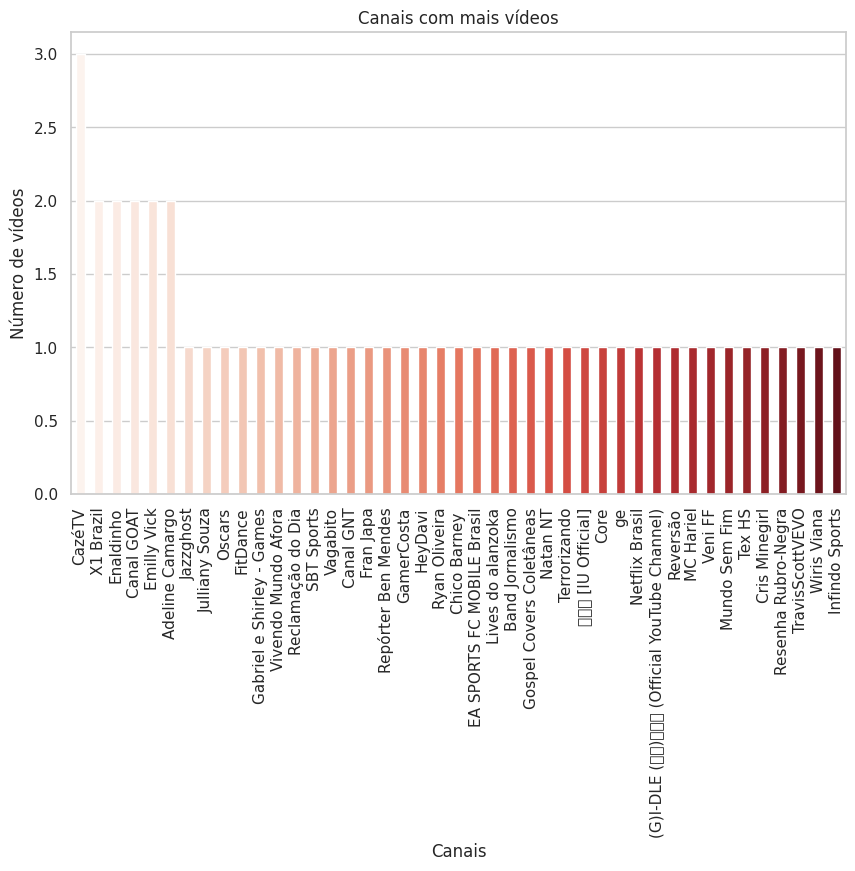

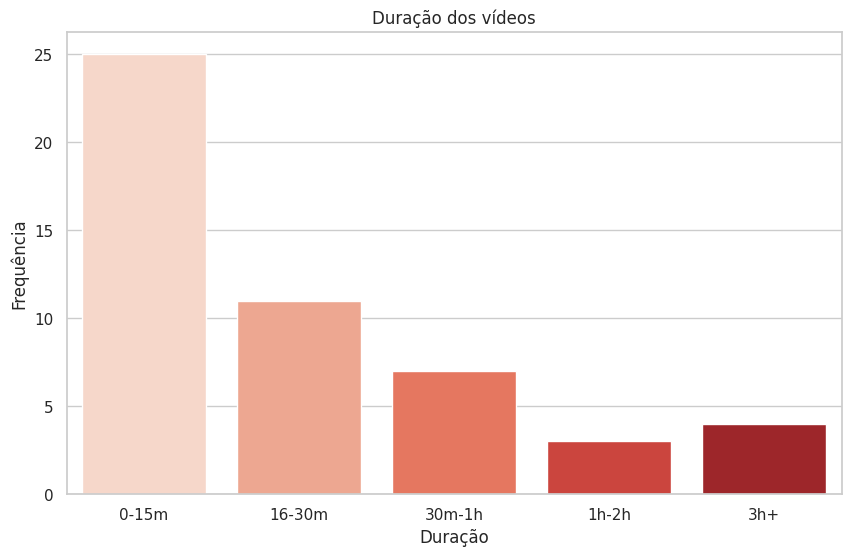

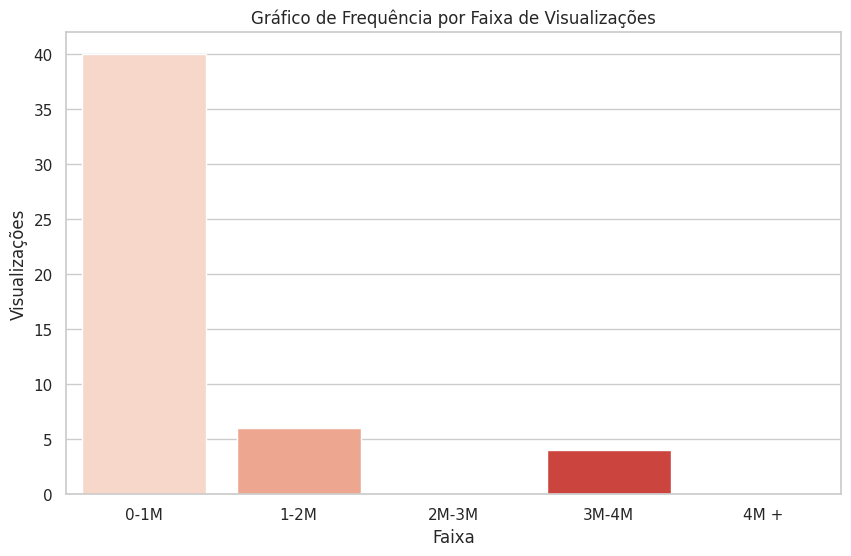

<Figure size 1000x600 with 0 Axes>

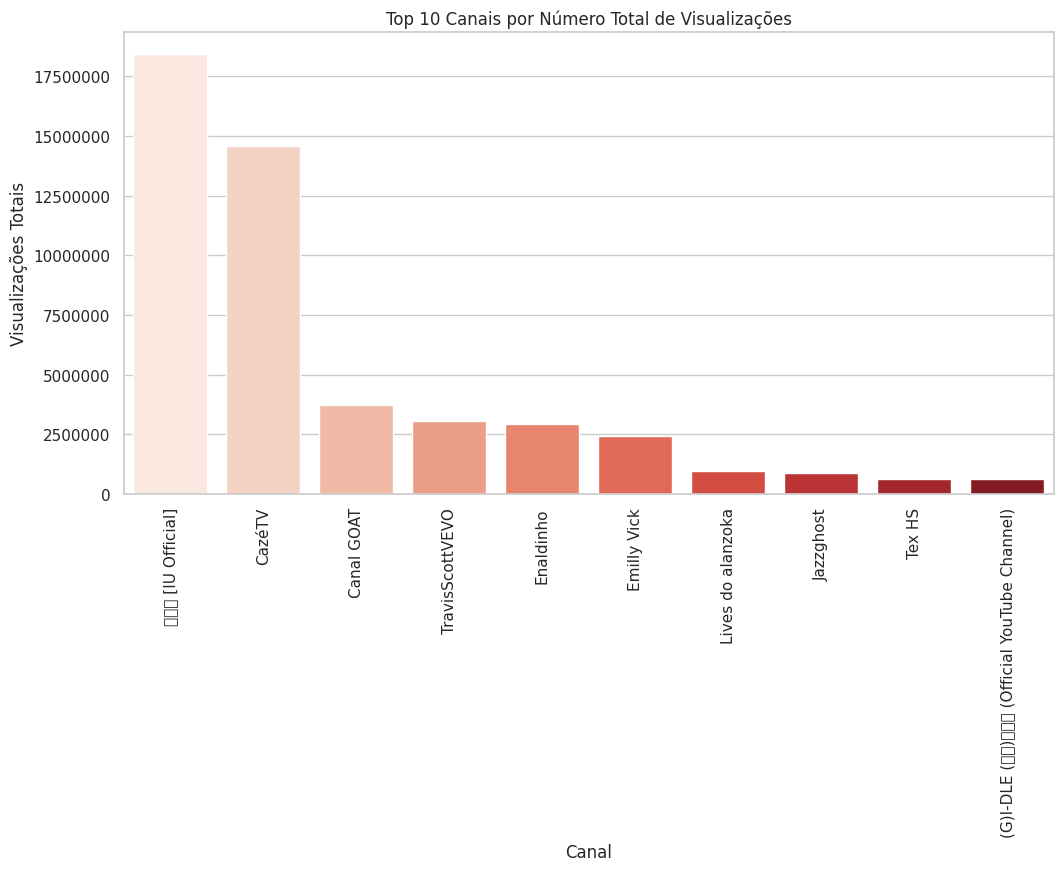

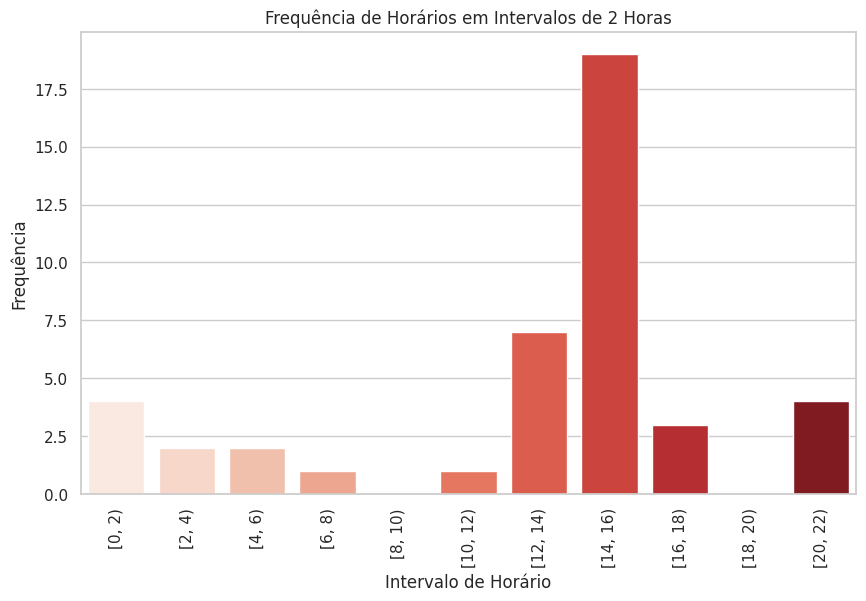

In [0]:
if __name__ == '__main__':
    # Configurações
    nome_conta = "etldatarafael"
    key_conta = "QZA1D2QY30SNBOlXTLfG8RY8IeSjfx6T4Jr2NHTJIAo16WmImq0nLQswh0zx2iTrBY4diUArdAXO+ASt4NM94A=="
    nome_container = 'silver'
    nome_arquivo = 'data_' + datetime.now().strftime("%Y%m%d") + '.csv'

    # Conectar ao Blob Storage Silver
    blob_service_client = BlobServiceClient(account_url=f"https://{nome_conta}.blob.core.windows.net", credential=key_conta)
    container_client = blob_service_client.get_container_client(nome_container)
    cliente_blob = container_client.get_blob_client(nome_arquivo)

    # Baixando Dados
    dados = cliente_blob.download_blob().readall().decode('utf-8')
    df = pd.read_csv(StringIO(dados))

    #Conectar ao Blob Storage Gold
    nome_container = 'gold'
    container_client = blob_service_client.get_container_client(nome_container)
    pasta_destino_local = '/tmp/graficos'
    os.makedirs(pasta_destino_local, exist_ok=True)

    # Criar e salvar gráficos
    criar_grafico_canais(df)
    criar_grafico_duracao(df)
    criar_grafico_visualizacoes(df)
    criar_grafico_top_canais(df)
    criar_grafico_frequencia_horarios(df)

    # Fechar a conexão
    blob_service_client.close()